In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.optimizers import Adam

In [5]:
path = 'jkse.csv'
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-04,6921.315918,6936.988770,6895.730957,6928.328125,6928.328125,247492300
1,2022-03-07,6905.324219,6917.933105,6843.812012,6869.065918,6869.065918,261271800
2,2022-03-08,6895.630859,6929.862793,6814.183105,6814.183105,6814.183105,246218500
3,2022-03-09,6836.671875,6888.930176,6824.090820,6864.440918,6864.440918,209971800
4,2022-03-10,6897.174805,6924.007813,6837.725098,6924.007813,6924.007813,194071700


In [6]:
train_count=int(0.7*len(df))
test_count=len(df)-train_count

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled = scaler.fit_transform(df['Open'].iloc[:train_count].values.reshape(-1,1))

X_train = []
y_train = []
prediction_days=10

for i in range(prediction_days, len(scaled)):
  X_train.append(scaled[i-prediction_days:i, 0])
  y_train.append(scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(164, 10, 1)

In [8]:
def makeModel():
  model = Sequential()
  model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
  model.add(Dropout(0.1))
  model.add(LSTM(units=50,return_sequences=True))
  model.add(Dropout(0.1))
  model.add(LSTM(units=50))
  model.add(Dropout(0.1))
  model.add(Dense(units=1))
  model.compile(optimizer=Adam(lr=0.001),loss='mean_squared_error')
  return model

In [9]:
model=makeModel()
model.fit(X_train,y_train,epochs=50,batch_size=4)

Epoch 1/50
41/41 [==============================] - 12s 10ms/step - loss: 0.0851
Epoch 2/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0439
Epoch 3/50
41/41 [==============================] - 0s 11ms/step - loss: 0.0388
Epoch 4/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0376
Epoch 5/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0410
Epoch 6/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0362
Epoch 7/50
41/41 [==============================] - 0s 12ms/step - loss: 0.0332
Epoch 8/50
41/41 [==============================] - 0s 11ms/step - loss: 0.0336
Epoch 9/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0268
Epoch 10/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 11/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0249
Epoch 12/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0187
Epoch 13/50
41/41 [===================

In [10]:
scaled_test = scaler.fit_transform(df['Open'].iloc[train_count:].values.reshape(-1,1))

X_test = []
for i in range(prediction_days, len(scaled_test)):
  X_test.append(scaled_test[i-prediction_days:i, 0])


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] ,1))
X_test.shape

(65, 10, 1)

In [11]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

3/3 [==============================] - 1s 6ms/step


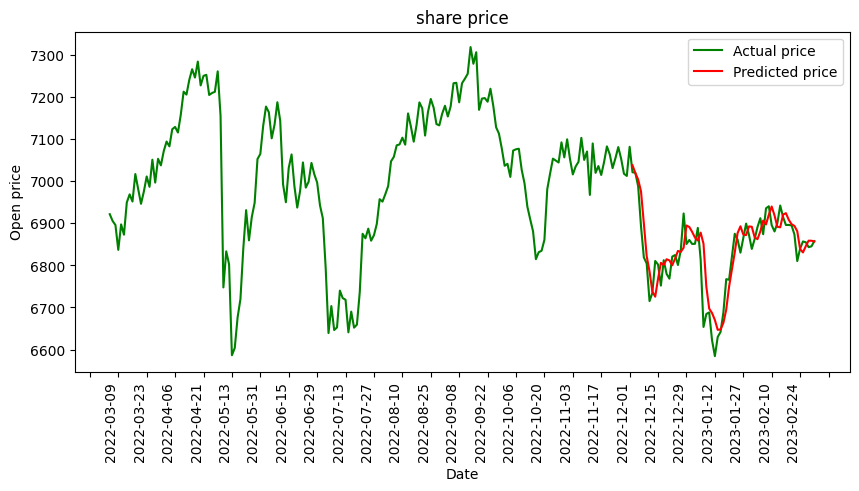

In [12]:
actual_prices = df['Open'].values

plt.figure(figsize=(10,5))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()

plt.plot(df["Date"], actual_prices, color='green', label="Actual price")
plt.plot(df["Date"].iloc[train_count+prediction_days:], predicted_prices, color= 'red', label="Predicted price")
plt.title("share price")
plt.xlabel("Date")
plt.ylabel("Open price")
plt.legend()
plt.xticks(rotation=90)

plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
MSE = mean_squared_error(actual_prices[prediction_days+train_count:], predicted_prices)
RMSE = math.sqrt(MSE)
MAPE = mean_absolute_percentage_error(actual_prices[prediction_days+train_count:], predicted_prices)
# print("%.2f" % MAPE*100)
print("MAPE: {:.3f}%".format(MAPE*100))
print("RMSE: {:.3f}".format(RMSE))

MAPE: 0.505%
RMSE: 46.661
